# Clustering Hierarchical

### Importacion de librerias 

In [330]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go 
import plotly.express as px 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster

# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler 
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


#### Importacion del archivo

In [331]:
df = pd.read_csv("Mall_Customers.csv")
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [332]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Mapeo de la poblacion de estudio 

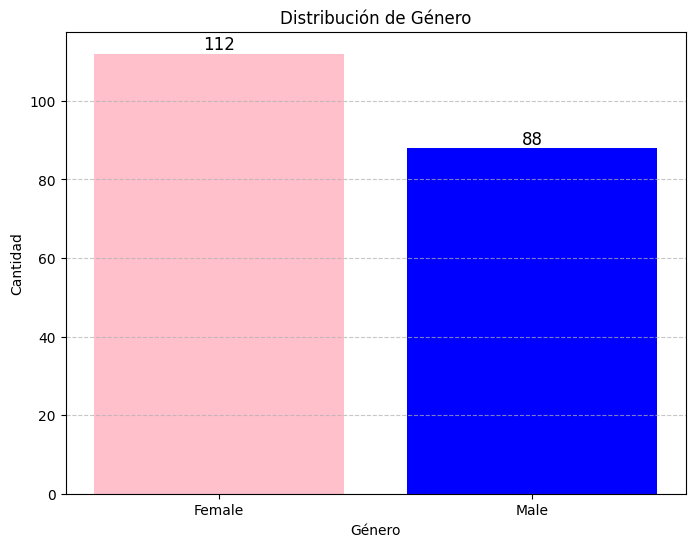

In [334]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
            ha='center', va='bottom', fontsize=12)
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Exploracion de Datos Atipicos 

Text(0.5, 1.0, 'Ingresos Atipicos')

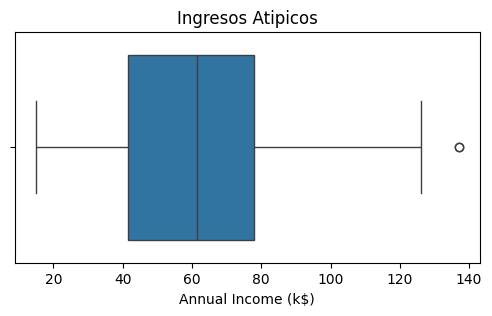

In [335]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Ingresos Atipicos')

#### Eliminacion de Datos Atipicos 

In [336]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((df['Annual Income (k$)']<nivel_minimo)|(df['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos por ingreso atípicos es {}".format(Total_Atipicos))

El total de datos por ingreso atípicos es 14


In [337]:
df=df[(df['Annual Income (k$)']<nivel_maximo)&(df['Annual Income (k$)']>nivel_minimo)]
df_filtrado=df

In [338]:
Total_Atipicos=((df['Annual Income (k$)']<nivel_minimo)|(df['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos por ingreso atípicos es {}".format(Total_Atipicos))

El total de datos por ingreso atípicos es 0


### Data Limpia

In [339]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


## Exploracion de Correlacion de Datos
### Graficas de correracion de datos 


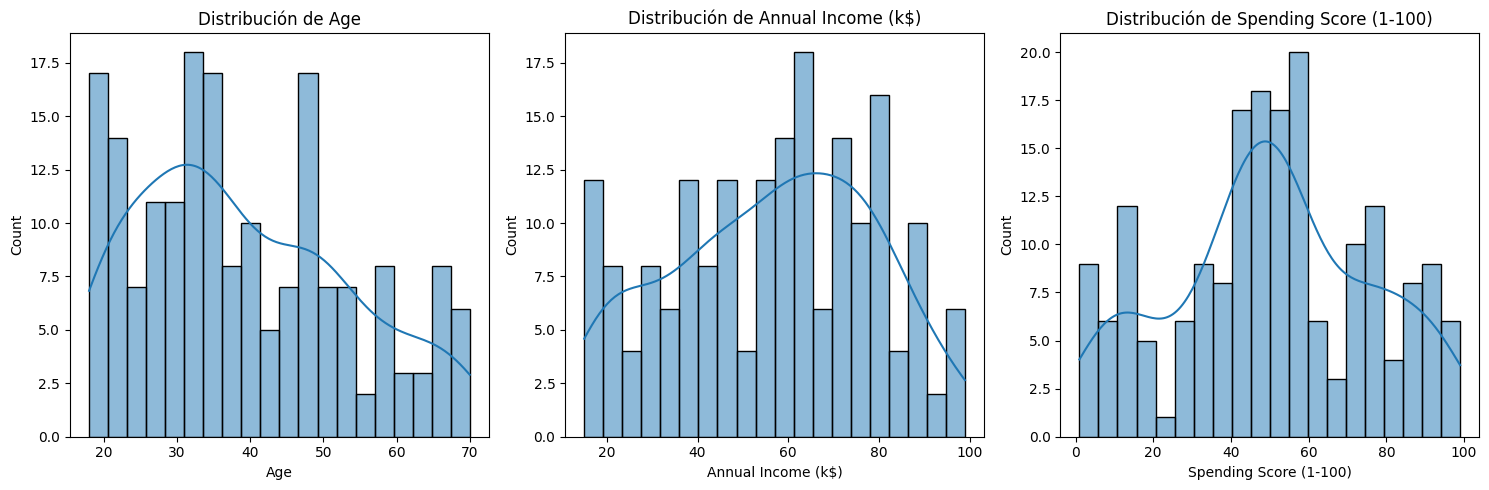

In [340]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_filtrado[col], kde=True, bins=20)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

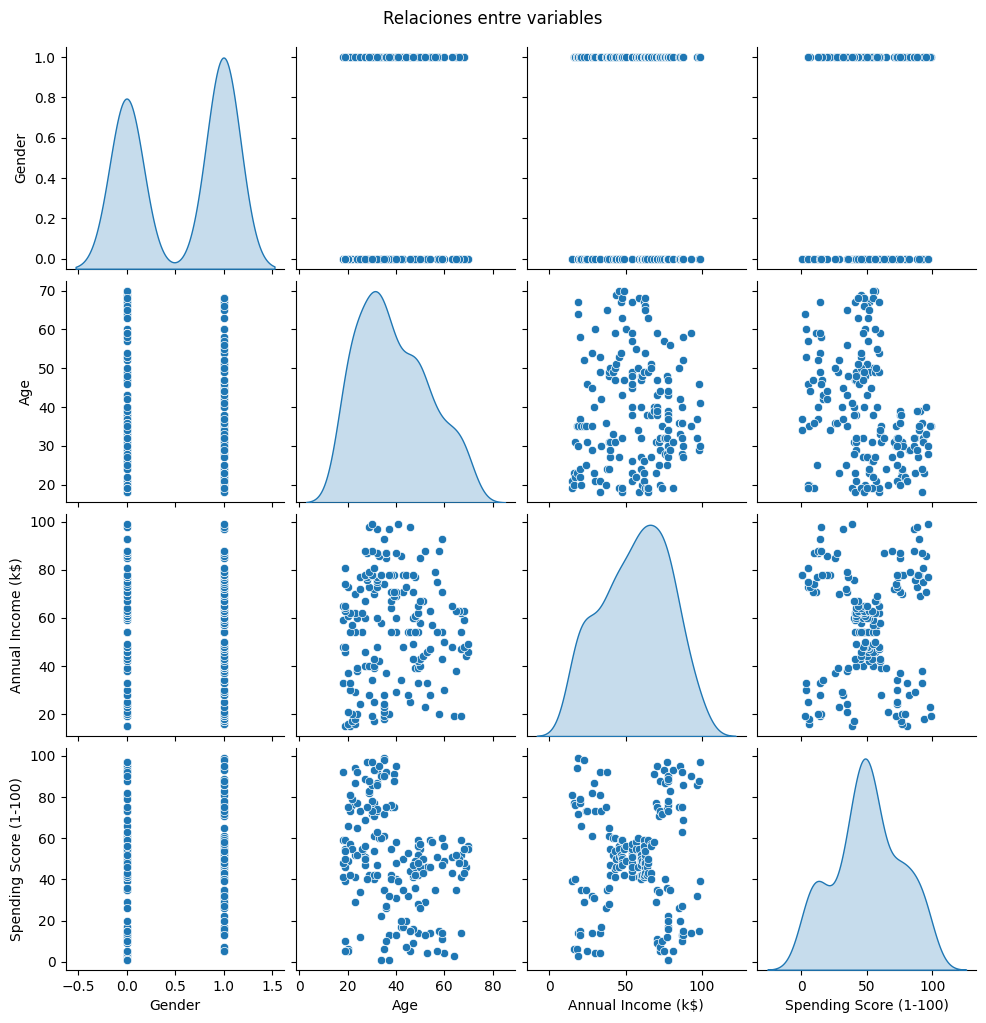

In [341]:
df_filtrado['Gender'] = df_filtrado['Gender'].map({'Male': 0, 'Female': 1})  
sns.pairplot(df_filtrado[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle('Relaciones entre variables', y=1.02)
plt.show()


### Distribucion en Data

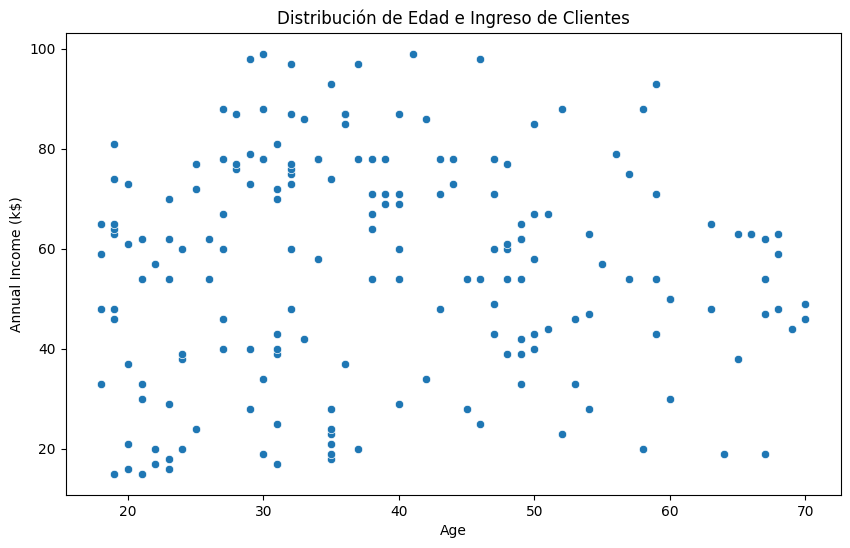

In [342]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=df_filtrado['Annual Income (k$)'], x=df_filtrado['Age'])
plt.title('Distribución de Edad e Ingreso de Clientes')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Age')
plt.show()

## Estandarizacion de datos

In [343]:
data = df_filtrado.drop(columns=['CustomerID']) 
scaler = StandardScaler()  #eliminacion de Media y escalado
data_normal = scaler.fit_transform(data)
df_normalizado = pd.DataFrame(data_normal, columns=data.columns)

In [344]:
data=df_normalizado[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

### Grafica de Clustering Jerarquico 

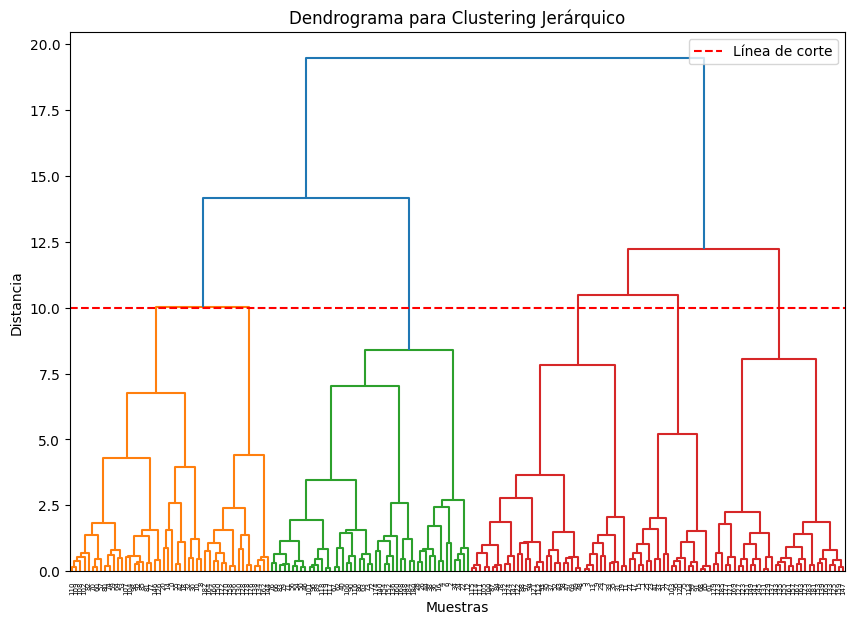

In [345]:
df_normalizado = np.nan_to_num(df_normalizado)  


linked = linkage(df_normalizado, method='ward')  # Enlace jerárquico con método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.axhline(y=10, color='r', linestyle='--', label='Línea de corte')
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.legend()
plt.show()

#### Coeficientes de Rendimiento

In [346]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(df_normalizado)

In [347]:
sil_score = silhouette_score(df_normalizado, labels)
ch_score = calinski_harabasz_score(df_normalizado, labels)
db_score = davies_bouldin_score(df_normalizado, labels)


In [348]:
table_data = [
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", ch_score],
    ["Indice Davies Bouldin", db_score]
]

from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
|  Coeficiente Silhouette  | 0.24067033365432647 |
| Indice Calinski Harabasz | 58.378105175008905  |
|  Indice Davies Bouldin   | 1.3574770120949082  |
+--------------------------+---------------------+


### Agrupacion de los clusters

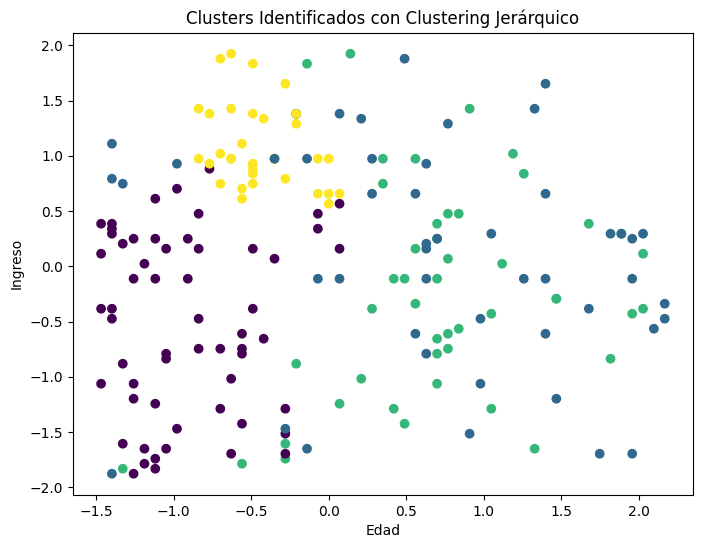

In [349]:
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
data['Cluster'] = model.fit_predict(df_normalizado)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()


# Conclusiones
Edad: Los clientes se agrupan en función de su edad, lo que sugiere que esta variable impacta directamente en las preferencias o patrones de compra.
Ingreso Anual: Los niveles de ingreso definen clusters claros, probablemente vinculados a distintos segmentos socioeconómicos.

Gráfico de Silueta: Una inspección adicional podría verificar si las Silhouettes están cercanas a +1, lo que indicaría clusters bien definidos y asignaciones correctas.
Coeficiente de variacion nos da como resultados Coeficiente Silhouette- 0.24067033365432647 ,Indice Calinski Harabasz-58.378105175008905 , Indice Davies Bouldin-1.3574770120949082

Los cuatro clusters identificados reflejan una segmentación inicial basada en la edad e ingreso anual.
Aunque los clusters son significativos, existe margen para mejorar la separación y la coherencia ajustando parámetros o incorporando más variables.
Recomendación:

Considerar la incorporación de más variables para mejorar la segmentación y obtener grupos más diferenciados.